# 8-6. 프로젝트: 고양이 수염 스티커 만들기


# Step 1. 스티커 구하기 or 만들기
***
(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

# Step 2. 얼굴 검출 & 랜드마크 검출 하기
***
오늘 배운 dlib을 이용해서 얼굴의 bounding box   
위치와 landmark의 위치를 찾아주세요.

# 라이브러리 적용하기


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

준비한 이미지 불러오기


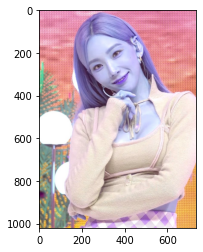

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/태연2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

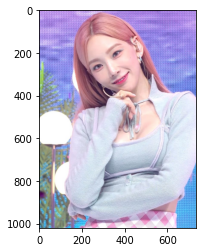

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸기.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog를 이용해서 얼굴의 bounding box를 추출

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()


cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


찾은 얼굴을 화면에 출력해보기

rectangles[[(241, 167) (464, 390)]]


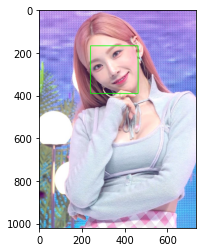

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 모델 불러오기


In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


`landmark_predictor` 는 `RGB 이미지`와 `dlib.rectangle`을 입력 받아 `dlib.full_object_detection` 를 반환

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
list_landmarks

68


[[(239, 294),
  (256, 317),
  (275, 337),
  (296, 355),
  (321, 369),
  (350, 377),
  (379, 383),
  (408, 386),
  (432, 376),
  (451, 358),
  (462, 333),
  (470, 306),
  (475, 276),
  (471, 245),
  (460, 214),
  (447, 183),
  (431, 154),
  (229, 266),
  (232, 248),
  (245, 235),
  (262, 227),
  (281, 224),
  (313, 201),
  (326, 182),
  (344, 167),
  (365, 158),
  (388, 160),
  (315, 238),
  (326, 257),
  (337, 275),
  (349, 294),
  (343, 315),
  (354, 312),
  (365, 308),
  (371, 298),
  (376, 289),
  (262, 275),
  (267, 262),
  (280, 255),
  (295, 258),
  (286, 267),
  (274, 273),
  (347, 224),
  (351, 206),
  (364, 196),
  (379, 194),
  (373, 206),
  (361, 216),
  (347, 342),
  (355, 334),
  (364, 326),
  (376, 323),
  (384, 314),
  (400, 304),
  (422, 290),
  (415, 314),
  (405, 331),
  (396, 340),
  (384, 345),
  (369, 347),
  (352, 341),
  (370, 331),
  (381, 327),
  (390, 319),
  (418, 296),
  (395, 321),
  (386, 329),
  (375, 334)]]

# 랜드마크를 영상에 출력해 보기

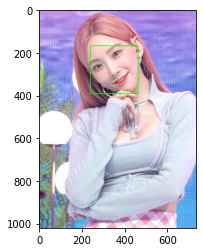

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3. 스티커 적용 위치 확인하기
***
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.


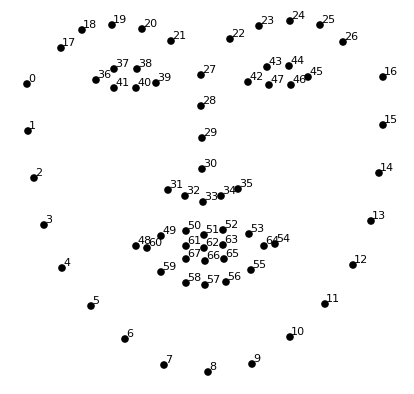

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 최적의 위치 찾기
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(365, 308)
(x,y) : (365,420)
(w,h) : (224,224)


# 준비해 둔 스티커 이미지를 읽어서 적용하기

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(224, 224, 3)


원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정

In [12]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))   # y값이 음수가 됨.

(x,y) : (253,196)


-y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정

In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (253,196)


코 끝인 33 번보다 좋은 위치가 있을 거예요.

# Step 4. 스티커 적용하기
***
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

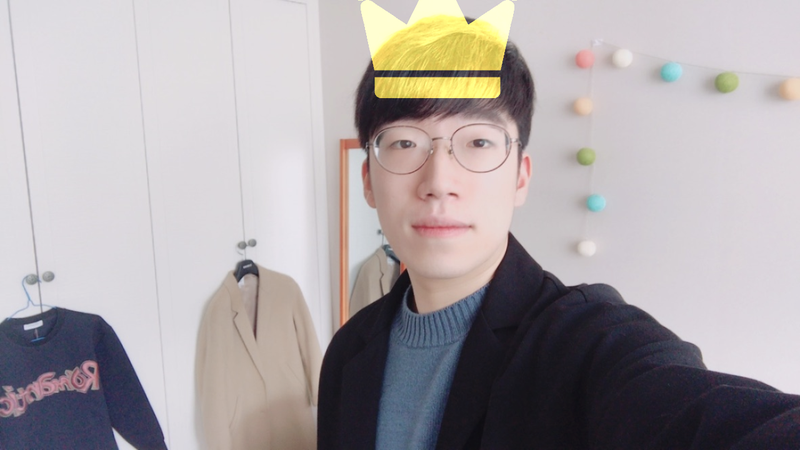

In [14]:
# 스티커의 배경을 원본이미지로 바꾼 이미지를 다시 원본이미지로 만들기.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5 , 0)
# cv2의 addWeighted를 사용해서 불투명도를 주었다.


# 결과 이미지 출력하기

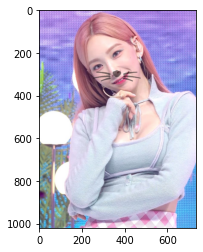

슝~


In [15]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
print("슝~")

# Step 5. 문제점 찾아보기
***
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
* 실행 속도가 중요할까요?
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

카메라의 각도를 바꿔가면서 이미지를 출력해본 결과, 여러가지 문제점이 있었다.  
1.얼굴 각도가 정면이 아니라 바뀔때 고양이 수염 이미지가 그대로인 문제점이 있다.  
2.멀리서 촬영했을때 얼굴이 작게 나오는데 그렇게 되면 좌표값이 전체적으로 작아지는 현상이 발생한다.  
그래서 위치를 조절할때 어려움이 발생한다.  


# 회고

카메라 스티커 앱을 만드는 전체적인 과정을 진행하였다.  
전반적인 과정은 원본이미지에 스티커 앱